##### DS 3000 - Assignment 5

**Student Name**: Lauren Li

**Date**: 06/03/2025


### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

## Helpful resources 
Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment inside the code cell, or you can list them below. 

You do not need to cite the official python documentation.


## Question 1: Load the Data

In this assignment, you will build a machine learning model that predicts the birthweight. You will experiment with creating both the k-NN and Random Forest algorithms to determined which produces the best model.

Write python code to answer the questions below and ensure that you round the result of all numeric calculations to 2 decimal places. 

**load the data directly from the URL** into a DataFrame.

In [4]:
#import pandas
import pandas as pd
#import some libaries for graphing
import matplotlib.pyplot as plt
import seaborn as sns

#loading in data directly from URL
babies_df = pd.read_csv("https://drive.google.com/uc?id=145n4_o1g5ZMrnV_DZt8tR9rjZLlJvU5K")
#print head to look at data
babies_df.head()

,case,bwt,gestation,parity,age,height,weight,smoke
0,1,120,284.0,0,27.0,62.0,100.0,0.0
1,2,113,282.0,0,33.0,64.0,135.0,0.0
2,3,128,279.0,0,28.0,64.0,115.0,1.0
3,4,123,NaN,0,36.0,69.0,190.0,0.0
4,5,108,282.0,0,23.0,67.0,125.0,1.0


## Question 2: Data Prep & EDA
(10 pts) Data Prep & EDA
Prepare the data for analysis. Ensure that you address the following:

- Perform EDA using the dataset to demonstrate patterns.
- Handle any missing data and invalid data. Justify your approach.
- Plot a histogram of the birth weight and explain the overall distribution.

### Cleaning the data

In [7]:
#describe the data
babies_df.describe(include = 'all')

,case,bwt,gestation,parity,age,height,weight,smoke
count,1236.000000,1236.000000,1223.000000,1236.000000,1234.000000,1214.000000,1200.000000,1226.000000
mean,618.500000,119.576861,279.338512,0.254854,27.255267,64.047776,128.625833,0.394780
std,356.946775,18.236452,16.027693,0.435956,5.781405,2.533409,20.971862,0.489003
min,1.000000,55.000000,148.000000,0.000000,15.000000,53.000000,87.000000,0.000000
25%,309.750000,108.750000,272.000000,0.000000,23.000000,62.000000,114.750000,0.000000
50%,618.500000,120.000000,280.000000,0.000000,26.000000,64.000000,125.000000,0.000000
75%,927.250000,131.000000,288.000000,1.000000,31.000000,66.000000,139.000000,1.000000
max,1236.000000,176.000000,353.000000,1.000000,45.000000,72.000000,250.000000,1.000000


In [8]:
#find what datatype each variable is
babies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   case       1236 non-null   int64  
 1   bwt        1236 non-null   int64  
 2   gestation  1223 non-null   float64
 3   parity     1236 non-null   int64  
 4   age        1234 non-null   float64
 5   height     1214 non-null   float64
 6   weight     1200 non-null   float64
 7   smoke      1226 non-null   float64
dtypes: float64(5), int64(3)
memory usage: 77.4 KB


In [9]:
#check for null values
babies_df.isnull().sum().sort_values(ascending=False)

weight       36
height       22
gestation    13
smoke        10
age           2
case          0
bwt           0
parity        0
dtype: int64

Looking through this data, we can see that there are null values within the dataset as well as some fields that are should be a different datatype

In [11]:
#delete all null values
babies_df = babies_df.dropna()

#check for that null values have been dropped
babies_df.isnull().sum().sort_values(ascending=False)

case         0
bwt          0
gestation    0
parity       0
age          0
height       0
weight       0
smoke        0
dtype: int64

In [12]:
#make smoke into integer rather than float (as it is a binary indicator)
babies_df['smoke'] = babies_df['smoke'].astype(int)

#check types again
babies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1174 entries, 0 to 1235
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   case       1174 non-null   int64  
 1   bwt        1174 non-null   int64  
 2   gestation  1174 non-null   float64
 3   parity     1174 non-null   int64  
 4   age        1174 non-null   float64
 5   height     1174 non-null   float64
 6   weight     1174 non-null   float64
 7   smoke      1174 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 82.5 KB


In [13]:
#remove unnecessary case column
babies_df.drop(columns='case', inplace=True)

The data has been cleaned, with null values cleaned out and the smoke field turned into int rather than float. All the other values makes sense as float values, as they are not binary indicators. However, we are not done yet! Since we want to use this data to do some machine learning modeling, we need to get rid of the outliers within the dataset. This will help ensure the modeling is more accurate.

In [15]:
#cleaning outliers from the dataset
#function that helps to remove outliers from the dataset using interquartile range
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

#deleting outliers from the data set for the possible columns
for col in ['bwt', 'gestation', 'age', 'height', 'weight']:
    babies_df = remove_outliers_iqr(babies_df, col)

In [16]:
print(f"Cleaned dataset shape: {babies_df.shape}")

Cleaned dataset shape: (1045, 7)


Now, the data has been completely cleaned and will hopefully help us produce more accurate predictions for the birthweight of babies.

### Data Exploration

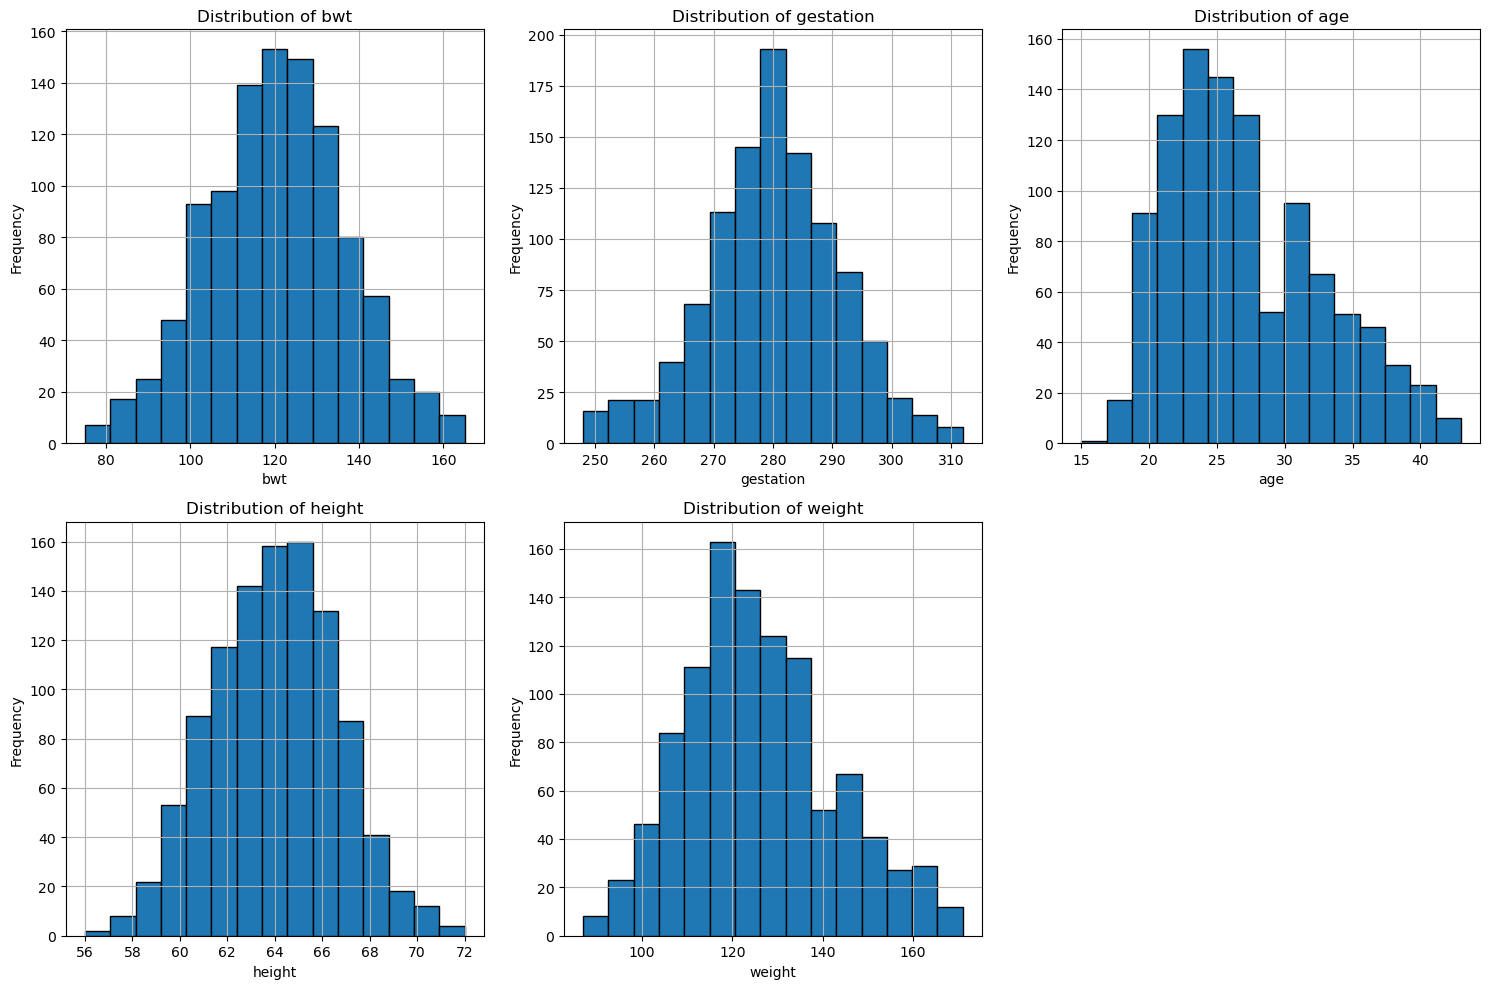

In [19]:
#list of numerical columns
numerical_cols = ['bwt', 'gestation', 'age', 'height', 'weight']

#create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

#plot histograms and label axes
for i, col in enumerate(numerical_cols):
    babies_df[col].hist(ax=axes[i], bins=15, edgecolor='black')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

#hide any unused subplots
for j in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Printing out all of these histograms allows us to see the frequency the values for each numerical value within data set. Looking at these histograms, we can see that some have a more normal distribution, without much of a skew, such as the frequency of baby birthweights. On the other hand, we can see graphs like the distribution of the mother's weights has a right skew. These skews show us how some of the data might have outliers and this gives us the general feel of the dataset.

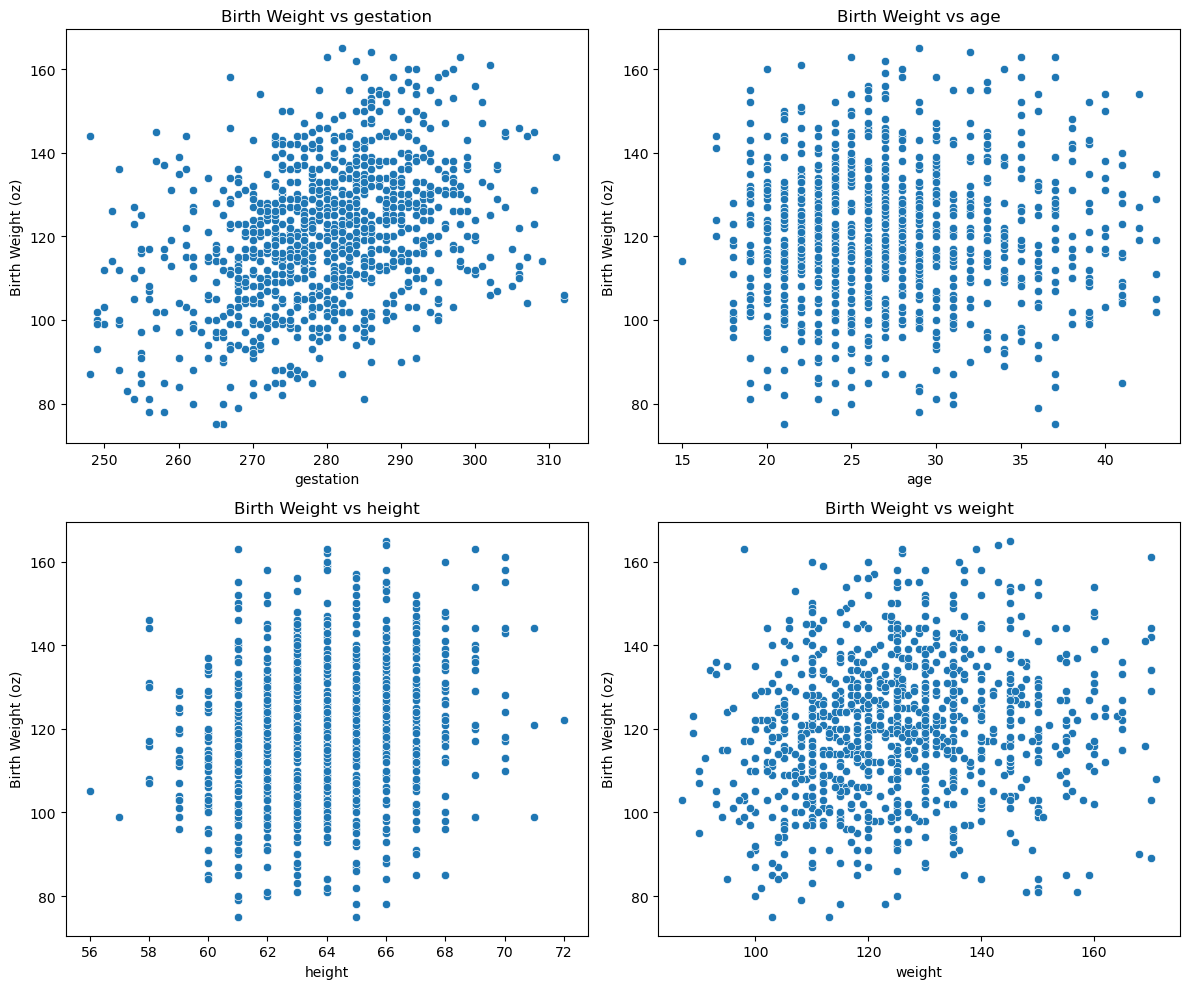

In [21]:
#possible predictors for birthweight
predictors = ['gestation', 'age', 'height', 'weight']

#subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

#plot scatter plots
for i, col in enumerate(predictors):
    row = i // 2
    col_idx = i % 2
    sns.scatterplot(x=col, y='bwt', data=babies_df, ax=axes[row][col_idx])
    axes[row][col_idx].set_title(f'Birth Weight vs {col}')
    axes[row][col_idx].set_xlabel(col)
    axes[row][col_idx].set_ylabel('Birth Weight (oz)')

plt.tight_layout()
plt.show()

Since throughout this data set, we are trying to look for a model to predict the birthweight of newborn babies depending on the given factors, I decided to visualize some of the possible things that could affect a baby's birthweight. 

Looking at the birth weight vs gestation graph, it can be see that there seems to be a positive correlation, with birth weight increasing with longer lengths of gestation. This correlation could make sense when thinking in the terms of a baby's development how the longer a fetus stays in their mother's womb, the more developed they tend to be. However further exploration could be used to see if this correlation makes sense.

Looking at the birth weight vs age (mother's age) and the birth weight vs height (mother's height), it can be seen that the points are quite scattered. These two graphs don't really show any correlation between the birth weight and the mother's age/height. However, perhaps one of these factors plus another factor could change something for the baby's birth weight.

Lastly, looking at the birth weight vs weight (mother's weight), it can be seen that there seems to be a slightly positive correlation, showing that maybe the more the mother weights the more the newborn child will weigh as well, but it doesn't really tell too much in those terms.

These scatter plots seem to show us how there may be some possible correlations between birth weight and gestation length/mother's weight, but more exploring must be done before coming to conclusions.

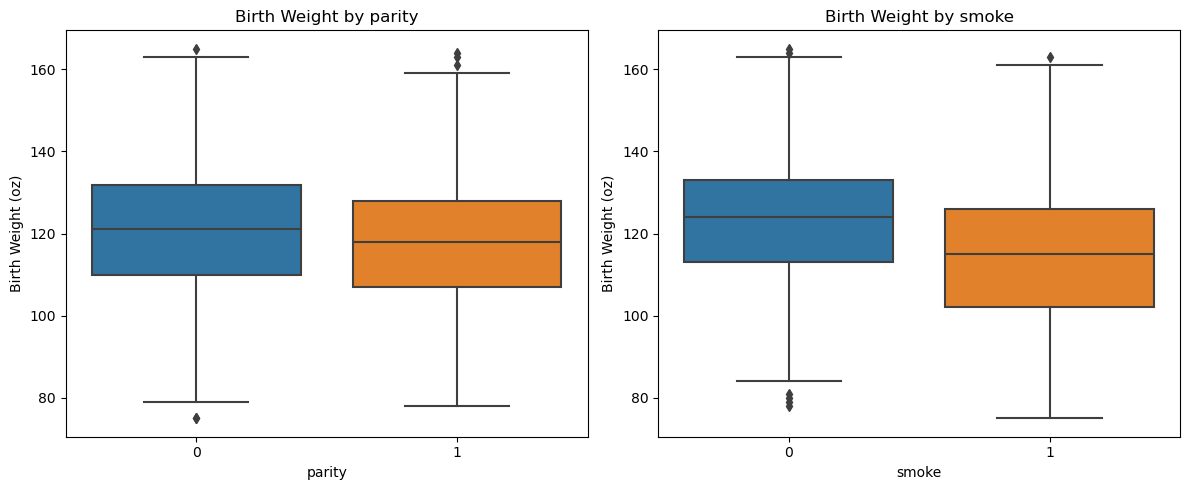

In [23]:
#create some box plots for categorical data 
#categorical columns
categorical_cols = ['parity', 'smoke']

#create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot box plots
for i, col in enumerate(categorical_cols):
    sns.boxplot(x=col, y='bwt', data=babies_df, ax=axes[i])
    axes[i].set_title(f'Birth Weight by {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Birth Weight (oz)')

plt.tight_layout()
plt.show()

Looking at these box plots, it can be seen that if the birth was the mother's first birth (parity) the mean birth weight is slightly lower than the mean birth weight of when it is not the mother's first birth. However this difference is quite close, and might not really mean anything in terms of birth weights.

Looking at the box plot on the right, it can be seen that there is a very clear difference in the mean of the birth weights between smoking and non-smoking mothers with non-smoking mothers' newborns having higher birth weights. This suggests that there may be a correlation between smoking and birth weights. 

Another thing to note with all the box plots in the two graphs is that there are outliers. In fact the only one with only one outlier is the birth weight of newborns from smoking mothers and further exploration is necessary before ruling out/determining if any of these factors can help predict birth weight.

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


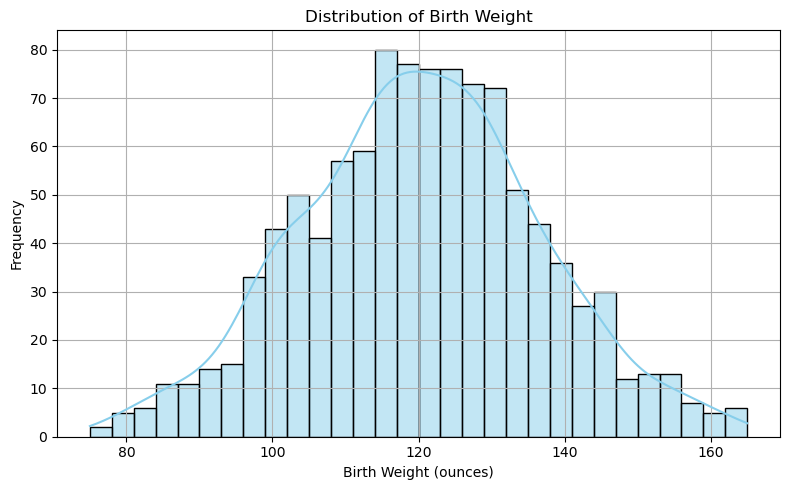

In [25]:
#plot histogram
plt.figure(figsize=(8, 5))
sns.histplot(babies_df['bwt'], bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Birth Weight')
plt.xlabel('Birth Weight (ounces)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

Looking at this graph, most babies in the dataset weigh between 110–130 ounces. The distribution is pretty symmetric, with a the left tail a bit longer, showing that there are some lower birth weights with outliers. This graph supports the idea that the birth weight is for the most part normally distributed, making it fitting for regression/modeling. However, the outliers might cause issues during the predictive modeling process and should be paid attention to. 

Through these various graphs in the EDA phase, we can see that birth weights seems to be suitable to be used for regression and modeling purposes, and we have found that certain explanatory variables seems to have correlation with birth weights of newborns (ex. length of gestation, smoker/non-smoker, etc.). However these correlations need to be further explored and observed in order to fully understand what is going on.

## Question 3: Feature Selection
(5 pts) Demonstrate which features are useful to build the model. Briefly explain the reason for the features that you selected.  Note: You can explore correlations, test hypothesis and/or other techniques. Remember that Data Science relies heavily on experimentation. Therefore, you are encouraged to experiment with your data.

* Tip #1: ensure that you carefully consider each feature and share the pros and cons of your decisions.
* Tip #2: you are predicting the birth weight, therefore it should not be one of your explanatory variables.

### Correlation matrix 

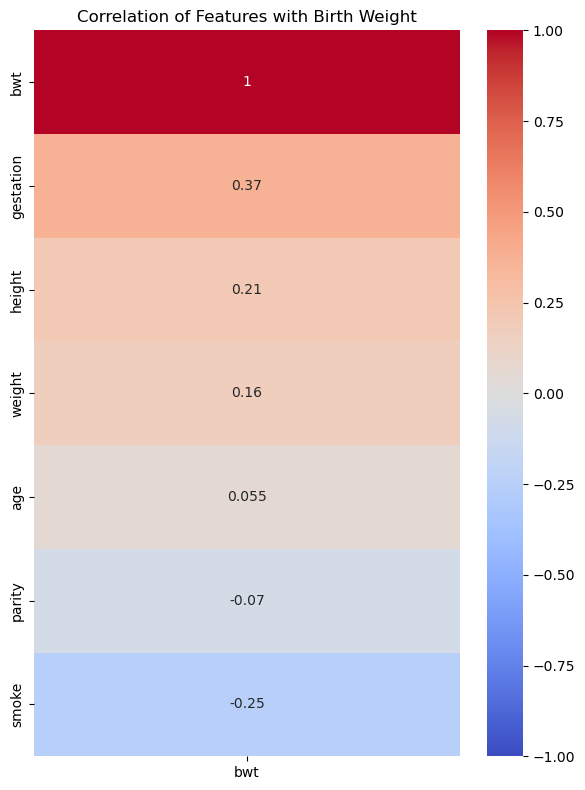

In [30]:
#make a copy of the dataframe
corr_df = babies_df

#compute correlation matrix
corr_matrix = corr_df.corr()

#focus on the correlation of birthweight
bwt_corr = corr_matrix[['bwt']].sort_values(by='bwt', ascending=False)

#plot heatmap in accordance to birthweight
plt.figure(figsize=(6, 8))
sns.heatmap(bwt_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation of Features with Birth Weight")
plt.tight_layout()
plt.show()

Looking at these features, it can clearly be seen that gestation and smoking have clear positive and negative effects on birth weights, respectively. Additionally, features such as height and weight have smaller effects on the birth weights of babies.

### Exploring correlations between numerical predictors & birth weight

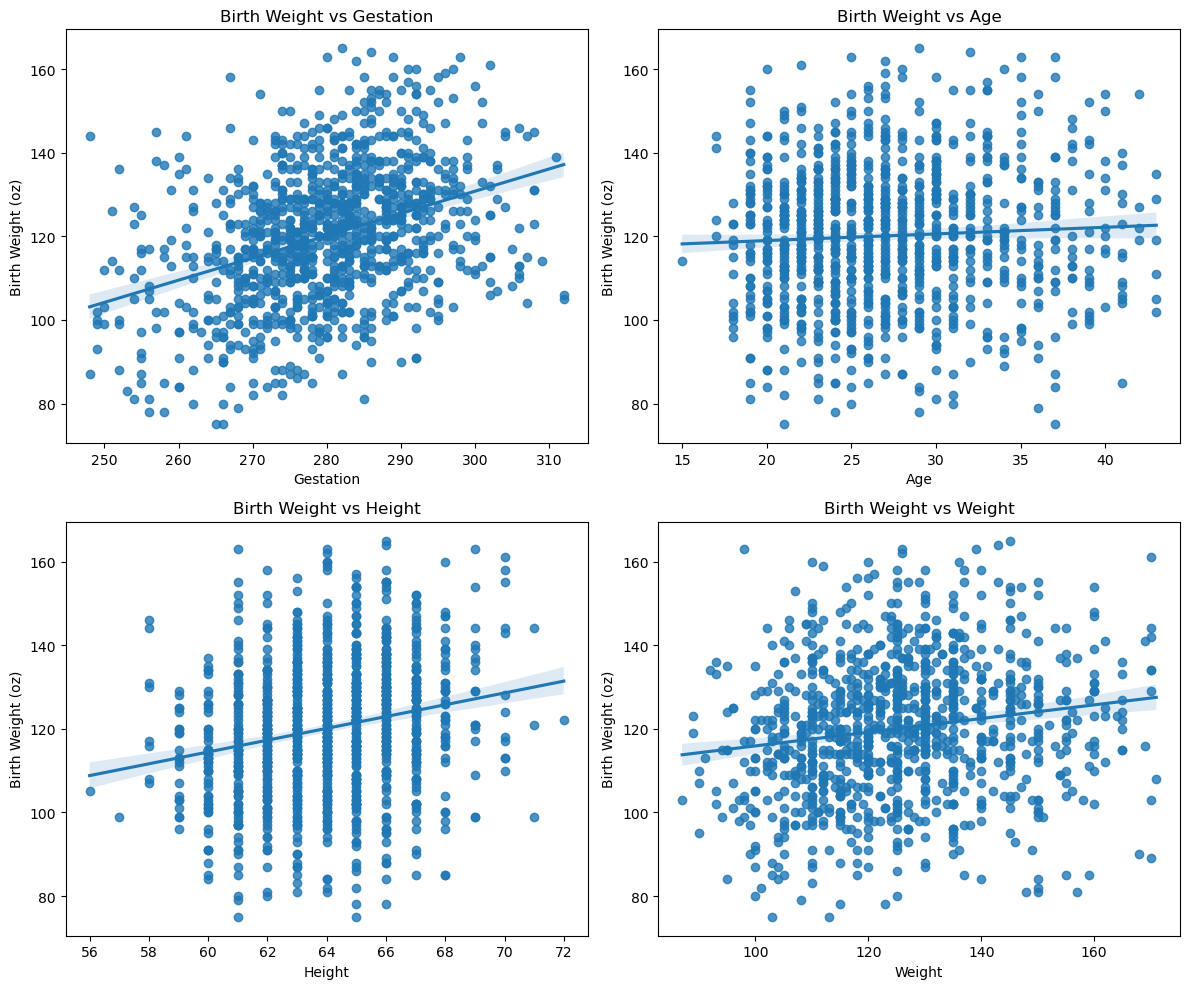

In [33]:
#exploring correlations/regression between the numerical predictors and birth weight
#note: the predictors list used here was defined during EDA
#plot the linear regressions
plt.figure(figsize=(12, 10))
for i, feature in enumerate(predictors):
    plt.subplot(2, 2, i+1)
    sns.regplot(x=babies_df[feature], y=babies_df['bwt'])
    plt.title(f'Birth Weight vs {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Birth Weight (oz)')
plt.tight_layout()
plt.show()

Looking at the gestation and mother's weight, it can be seen that there seems to be some positive correlation. However, the height and age doesn't seem to have any correlation between the baby's birth weight, and I think that we can leave those out of predicting the baby's birth weight. Let's take a look at the residuals to decide whether or not these fields should be used as a predictor. 

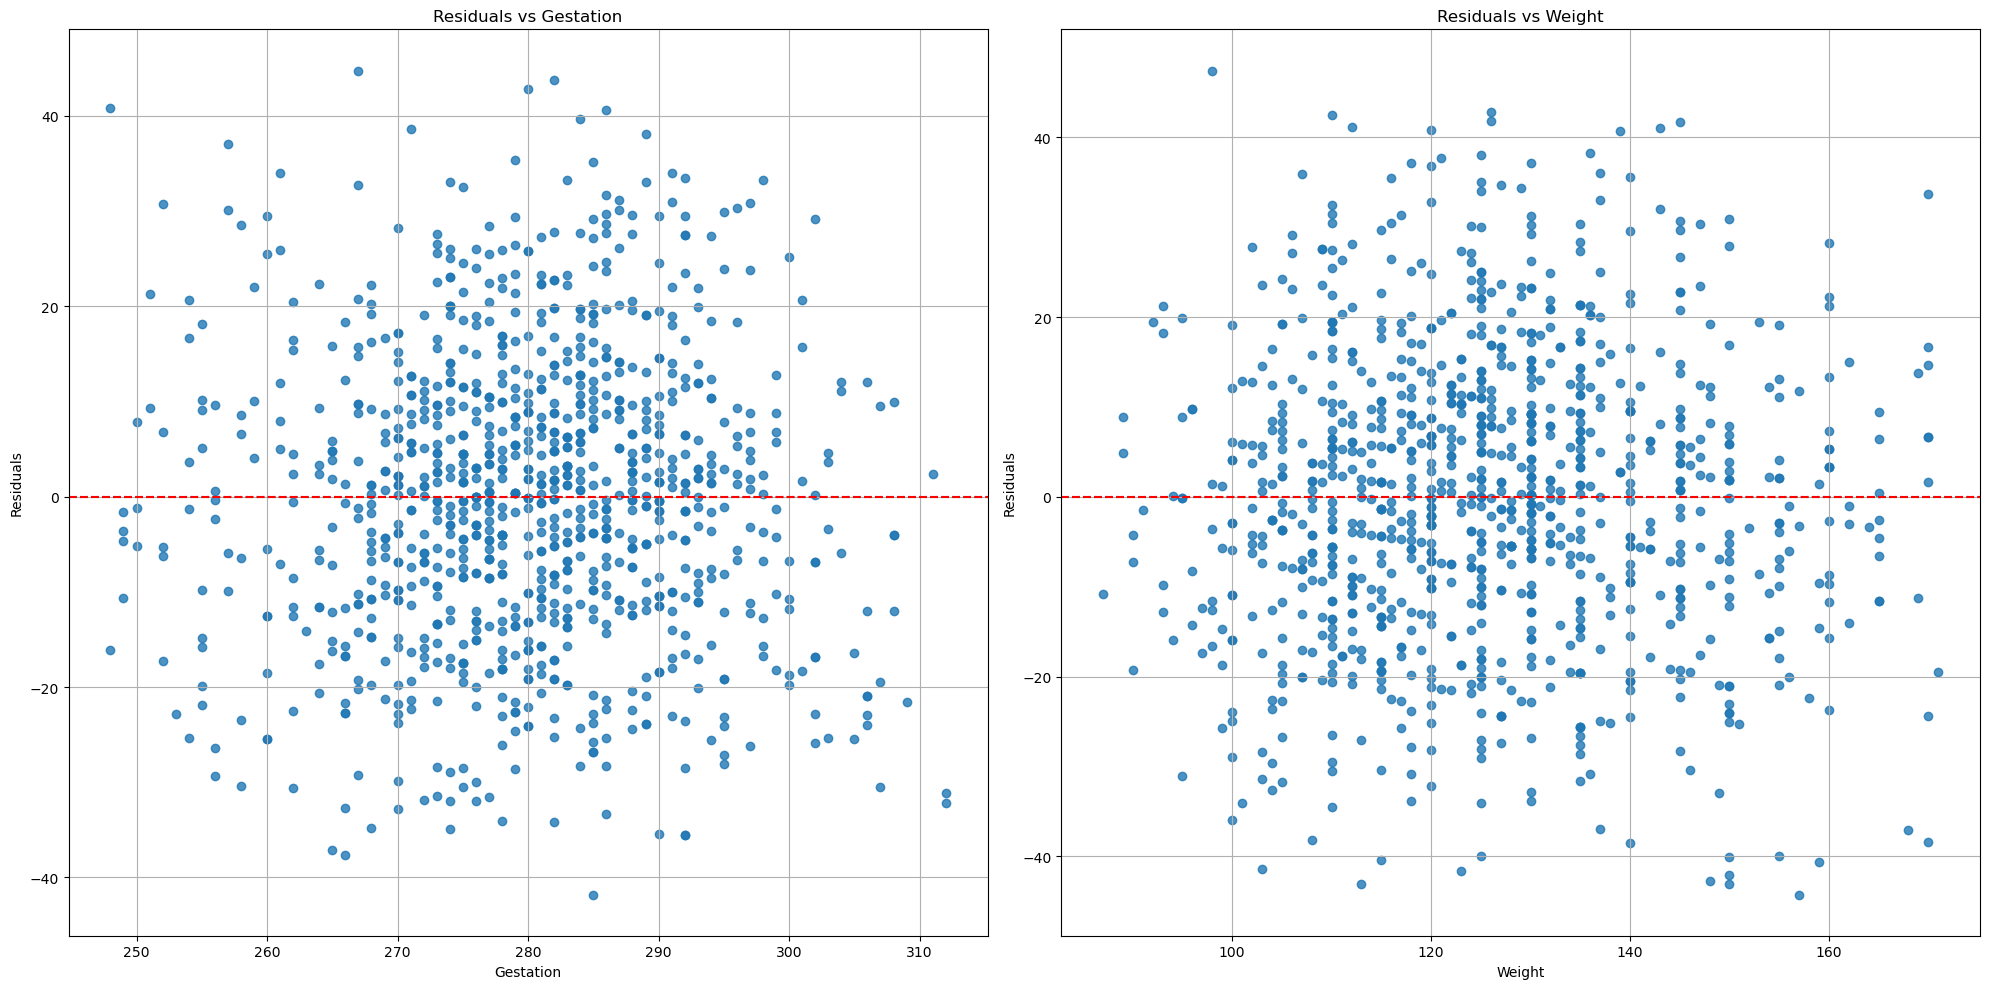

In [35]:
#possible predictors
possible_predictors = ['gestation', 'weight']

#plot residuals vs each possible predictor
plt.figure(figsize=(20, 10))
for i, possible_predictors in enumerate(possible_predictors):
    plt.subplot(1, 2, i+1)
    sns.residplot(x= babies_df[possible_predictors], y='bwt', data = babies_df)
    plt.xlabel(possible_predictors.capitalize())
    plt.axhline(0, color='red', linestyle='--')
    plt.ylabel('Residuals')
    plt.title(f'Residuals vs {possible_predictors.capitalize()}')
    plt.grid(True)

plt.tight_layout()
plt.show()

Looking at these scatters, it can be seen that the residual plot for gestation is pretty randomly scattered showing how length of gestation could be a pretty good predictor to be used to predict the birth weight for new born babies. Although the residuals for the weight of the mothers is pretty scattered and randomly spread out, the spread is a bit too large, suggesting weaker correlation and suggesting that maybe the mother's weight doesn't have as much to do with the birth weight of the child

### Hypothesis testing between smoking mothers & birth weight

From previous exploration during EDA, it was found that there seems to be a suggested correlation between smoking mothers and birth weight, with smoking negatively affecting the birth weight. I will how perform a t-sample t-test to check and see if the correlation is statistically significant or not. The alpha value will be 0.05.

Null Hypothesis: There is no significance between smoking mothers and the birth weight of newborn babies.

Alternative Hypothesis: There is significance between smoking mothers and the birth weight of newborn babies.

In [40]:
from scipy import stats

#separate birth weights based on smoking status
bwt_smokers = babies_df[babies_df['smoke'] == 1]['bwt']
bwt_nonsmokers = babies_df[babies_df['smoke'] == 0]['bwt']

#perform independent two-sample t-test
t_stat, p_value = stats.ttest_ind(bwt_smokers, bwt_nonsmokers, equal_var=False)

#print results
print("Mean birthweight for smokers:", round(bwt_smokers.mean(), 2))
print("Mean birthweight for non-smokers:", round(bwt_nonsmokers.mean(), 2))
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.17f}")

Mean birthweight for smokers: 114.97
Mean birthweight for non-smokers: 123.43
T-statistic: -8.21
P-value: 0.00000000000000088


Looking at the data, it can be seen that first of all, on average, the difference in birthweight between smoking and non-smoking mothers is around 9 ounces, with the newborns of mothers that don't smoke being heavier. Additionally, looking at the results of the two-sample t-testing, it can be seen that the P-value came out so small that 18 decimal places was needed in order to actually be able see some of the numbers. This is clearly smaller than the our alpha value of 0.05, making this result statistically significant showing a sort of correlation between birth weight and smoking mothers.

Note: the P-value was rounded to 2 decimal places in terms of significance (there were many leading zeros, but that wouldn't have told us much about the P-value)

After exploring this data further, I have decided to utilize length of gestation, whether or not the mothers smoke. I have chosen these fields to use as the features as through the exploration and experimentation, it is clear that gestation and smoking have an effect on the baby's birth weight. In the end, fields such as the mother's height and weight did not make it into the features list, as I felt that it just didn't have enough of an effect on the data to be relevant.

## Question 4: Data Partitioning
(2 pts) Partition the prepared data into train/test sets, ensure that your partitions are reproducible. Encode any categorical variables in your training set. Then, use the appropriate approach to encode your test set.

From before, the data was already randomized using a seed of 42, allowing for the randomization step of partitioning to be reproducible.

Additionally, the categorical variables of parity and smoking are already encoded into numbers.

In [45]:
from sklearn.model_selection import train_test_split

#obtain the features
X = babies_df[['gestation', 'smoke']]
#set y(response variable) as birth weight
y = babies_df['bwt'] 

#partition the prepared data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

Now, the data was has been properly split into the training and testing sets with 80% training and 20% testing. Additionally, it is now randomized in a reproducible way.

## Question 5: Model Development
(5 pts) Using the Random Forest algorithm, build a machine learning model that predicts the birth weight.  

Think about the following: Are you performing classification or regression? Ensure that you choose the appropriate Random Forest Classifier/Regressor from scikit-learn.

In [48]:
#import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

#build model
rf = RandomForestRegressor(random_state=7)
rf.fit(X_train, y_train)
bwt_forest_pred = rf.predict(X_test)

In [49]:
#round predicted values & print
rounded_preds = [round(pred, 2) for pred in bwt_forest_pred]
print('The predicted birth weight is: {}'.format(rounded_preds))

The predicted birth weight is: [114.3, 118.95, 121.16, 126.75, 118.95, 135.47, 121.62, 121.62, 123.62, 124.69, 105.6, 105.6, 100.51, 130.04, 123.62, 126.85, 139.87, 101.22, 122.32, 104.65, 119.07, 107.61, 106.0, 116.42, 104.65, 113.99, 121.65, 112.49, 126.85, 123.62, 111.88, 130.02, 123.64, 121.62, 115.33, 135.47, 104.72, 121.62, 121.65, 130.02, 111.62, 123.62, 123.13, 104.72, 124.69, 115.6, 124.69, 124.75, 116.79, 111.88, 105.6, 124.84, 125.84, 111.62, 120.7, 121.16, 124.84, 116.51, 124.69, 116.42, 136.02, 120.7, 107.92, 112.49, 139.87, 111.88, 135.47, 115.36, 125.84, 116.56, 114.3, 116.82, 121.65, 122.49, 102.8, 102.55, 115.05, 124.39, 123.13, 123.62, 118.95, 128.19, 120.7, 104.72, 137.17, 124.84, 116.25, 124.69, 124.84, 106.07, 123.62, 116.56, 126.29, 120.7, 121.65, 122.32, 100.9, 104.72, 137.17, 117.69, 126.77, 122.49, 124.69, 119.07, 125.03, 121.62, 101.22, 101.22, 119.07, 134.09, 115.33, 136.17, 130.04, 126.75, 126.85, 133.04, 131.92, 119.07, 121.62, 106.0, 125.84, 106.07, 140.21

Now that we have created the random forest regression model using regression, and generated the predictions, we can evaluate the validity of this model utilising the test data. 

## Question 6: Model Evaluation
(5 pts) Evaluate the predictions from your model and comment on the results. Ensure that you choose the appropriate metric to evaluate the model and round your calculations to two decimal places. Remember that we evaluate models differently depending on the task, i.e. classification or regression.

In [52]:
#accuracy
print('The accuracy of the Random Forest model is: {}'.format(round(rf.score(X_test, y_test), 2)))

#mse
mse = mean_squared_error(y_test, bwt_forest_pred)
print('The mse of the model is: {}'.format(round(mse, 2)))

The accuracy of the Random Forest model is: 0.13
The mse of the model is: 226.61


Looking at these evaluations, it does not look too good for this model. The accuracy of the model is only 13%, showing that the accuracy is quite low. Looks like some tuning is necessary

## Question 7: Model Tuning
(5 pts) What are your thoughts on the model's prediction capability? Did it do a good job of predicting the birth weight?
Note: it is okay if your first version of the model is not the best. However, there are strategies that we can use to improve it, such as tuning.

- **Tune the model**: you can control the number of trees in your forest using the n_estimators parameter. Refer to the sample code from the lecture and [also view the documentation**](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) to learn more about this algorithm and its parameters. Try at least five different values for the n_estimators parameter to determine if the model improved. Show all your steps to create, evaluate and tune each version of the model.
- Indicate which model performed the best.

In [55]:
from sklearn.model_selection import GridSearchCV
#use a parameter grid to run and see which n-estimator would give the best results
param_grid = {
    'n_estimators': [50, 100, 150, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

#do a grid search
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,                     #5-fold cross-validation
    scoring='r2',             #r^2 to find 'best' performance
    n_jobs=1,
)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=7), n_jobs=1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150, 200, 300]},
             scoring='r2')

In the above code, we stuck in 5 n_estimators along a bunch of other parameters in order to try and find the best model out of the bunch. 

In [57]:
#make some analyzations on what the grid search has returned
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validated R² score: ", round(grid_search.best_score_, 2))

#print best model score
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)
print('The accuracy of the Random Forest model is: {}'.format(round(best_model.score(X_test, y_test), 2)))

Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Best cross-validated R² score:  0.12
The accuracy of the Random Forest model is: 0.17


Running the cross validation for 5 different n-estimators, it was found that the best number of n_estimators is actually 50 and not the default 100. This would give us an end score of 0.17, meaning that the model is accurate 17% of the time. In other words, the best random forest regression model that we have found is 17% accurate. Not really the best results that we would want, but it looks like this is the best that we have got.

## Question 8: 
(15 pts) Perform steps 5-7 using the k-nn algorithm. Perform model tuning using at least 5 different values of k. Show all your steps to create, evaluate and tune each version of the model. Indicate which model performed the best.

### Build the model

In [61]:
#import necessary libraries
from sklearn.neighbors import KNeighborsRegressor

#set number of neighbors and create the model
knn=KNeighborsRegressor(n_neighbors = 30)
knn.fit(X_train, y_train)
bwt_knn_pred = knn.predict(X_test)

#print the predicted birthweights
rounded_Kpreds = [round(pred, 2) for pred in bwt_knn_pred]
print('The predicted birth weight is: {}'.format(rounded_Kpreds))

The predicted birth weight is: [115.93, 117.53, 116.1, 126.73, 117.53, 129.0, 123.7, 123.7, 116.83, 118.57, 111.87, 111.87, 106.4, 128.87, 116.83, 127.67, 133.27, 110.4, 123.77, 114.8, 113.77, 111.27, 111.33, 125.97, 114.8, 110.8, 117.87, 108.2, 127.67, 116.83, 115.1, 126.0, 126.57, 123.7, 118.87, 129.0, 107.67, 123.7, 117.87, 126.0, 109.7, 116.83, 121.1, 107.67, 118.57, 106.0, 118.57, 122.77, 115.23, 115.1, 111.87, 123.47, 126.43, 109.7, 117.37, 116.1, 123.47, 106.97, 118.57, 125.97, 133.27, 117.37, 126.53, 108.2, 133.27, 115.1, 129.0, 116.9, 126.43, 119.47, 115.93, 109.5, 117.87, 122.77, 108.9, 107.67, 110.27, 123.9, 121.1, 116.83, 117.53, 126.57, 117.37, 107.67, 127.3, 123.47, 116.4, 118.57, 123.47, 106.3, 116.83, 119.47, 121.1, 117.37, 117.87, 123.77, 106.0, 107.67, 127.3, 124.5, 129.03, 122.77, 118.57, 113.77, 132.0, 123.7, 110.4, 110.4, 113.77, 133.6, 118.87, 133.37, 128.87, 126.73, 127.67, 130.83, 131.03, 113.77, 123.7, 111.33, 126.43, 106.3, 125.77, 127.67, 126.73, 125.97, 128.

In the above code, I created the model for a k-NN machine learning model using the features of gestation and smoking. I also printed out the various predicted birthweights for the test set. Now, it is time to evaluate the model and figure out how close we got.

### Evaluate the model

In [64]:
#accuracy
print('The accuracy of the k-NN model is: {}'.format(round(knn.score(X_test, y_test), 2)))

#mse
mse = mean_squared_error(y_test, bwt_knn_pred)
print('The mse of the model is: {}'.format(round(mse, 2)))

The accuracy of the k-NN model is: 0.18
The mse of the model is: 212.43


Looking at this model, there is a 18% chance that this model is accurate. Although this already outperforms the previous random forest regression model, we still want to see if there is anything better that we can do to get a better model. Let's do some model tuning to try and find the best value to use for this k-NN model.

### Tune the model

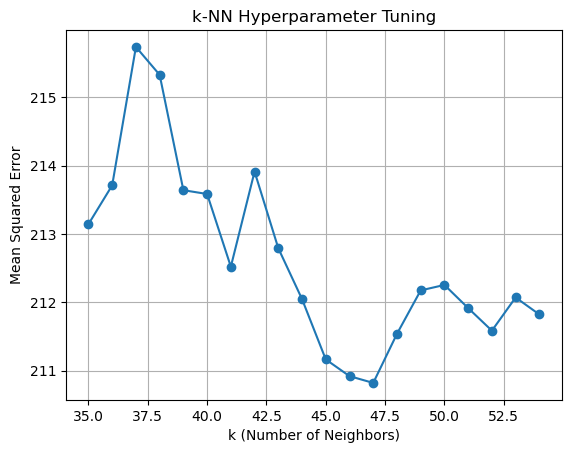

In [67]:
#take a look at mse for the different amount of neighbors (1-20)
errors = []
for k in range(35, 55):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    errors.append(mse)

plt.plot(range(35, 55), errors, marker='o')
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Mean Squared Error")
plt.title("k-NN Hyperparameter Tuning")
plt.grid(True)
plt.show()

The graph above shows the mse compared to the k number of neighbors. I a range of 35-55 to take a look at what might work for the k number of neighbors. The graph above is sufficient for me to look at how the models for all of these different neighbors could look like. From the graph, it looks like a value of 44 for the number of neighbors might be our best bet. Let's generate the model to test out that theory.

In [69]:
#set number of neighbors and create the model
knn_test47=KNeighborsRegressor(n_neighbors = 47)
knn_test47.fit(X_train, y_train)
bwt_knn_pred_47 = knn_test47.predict(X_test)

#print out the evaluations
#accuracy
print('The accuracy of the k-NN model is: {}'.format(round(knn_test47.score(X_test, y_test), 2)))

#mse
mse = mean_squared_error(y_test, bwt_knn_pred_47)
print('The mse of the model is: {}'.format(round(mse, 2)))

The accuracy of the k-NN model is: 0.19
The mse of the model is: 210.82


Using the new value for the number of k neighbors, the model now has a 19% chance to be accurate. Sure, this really isn't the best values that we would like our model to have, but it is at least better at predicting values compared to before, and seems to be the best number of neighbors for the job.

## Question 9: 
(3 pts) Compare both the best model from both the Random Forest and k-NN algorithms and explain which model is the most suitable to predict birthweight. Justify your response.

In [73]:
#random forest regression model accuracy
print('The accuracy of the Random Forest model is: {}'.format(round(best_model.score(X_test, y_test), 2)))
#k-nn regression model accuracy
print('The accuracy of the k-NN model is: {}'.format(round(knn_test47.score(X_test, y_test), 2)))

The accuracy of the Random Forest model is: 0.17
The accuracy of the k-NN model is: 0.19


Comparing the best models from the random forest regression and the k-number neighbors regression models, it can be seen that neither one of the 'best' models are really all that good at predicting the birth weight of newborn babies. Although the fact that maybe the number of features was insufficient, just looking at the experimentation and exploration of the data shows that none of the other features were really good to be used as predictors for the model to use and would have only ended up skewing the data. 

Looking at the best model for both model types, the best random forest regression model had a 17% accuracy rate while the best k-NN regression model had a 19% accuracy rate. As 19% is more accurate than 17%, it is clear that the k-NN model is more accurate than the than the random forest regression model, making the k-NN model the better model for predicting birth weights. 

HOWEVER, neither one of these two models had particularly desireable accuracy ratings for predicting birth weights. I feel like this is probably due to the lack of significant features within the dataset itself, as I was only able to find 2 predictors that were significant enough to generate predictions from. I believe that there is potential for both models to improve if only there were some more features that could be used as predictors.

## Question 10: Bonus Question
(+5 bonus points) The Random forest has a method that returns the importance of each feature in your model. Review the documentation to learn about feature importance. After which, write the appropriate code that demonstrates which features were the most important when making the predictions. Visualize the feature importance using the best model and explain the results.

In [75]:
#get the best model from the grid search (again)
best_model = grid_search.best_estimator_

#get feature importances
importances = best_model.feature_importances_

#combine with feature names
feature_names = X_train.columns  # assuming you used X_train for training
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

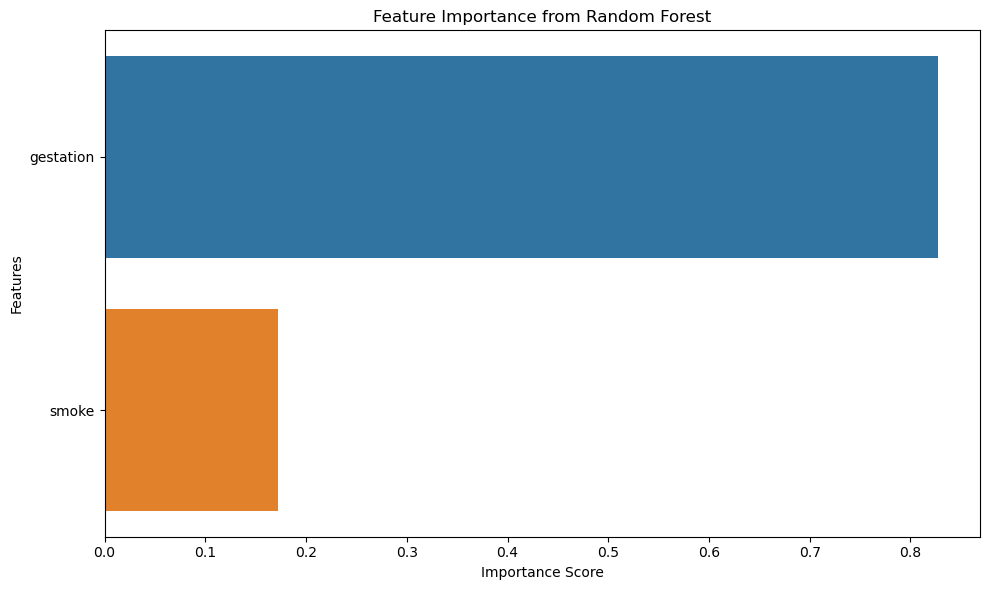

In [77]:
#visualize results
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

For the models, I ended up using the features length of gestation and whether or not the mother smoked. From this features importance bar chart, it can clearly be seen that gestation beats smoking by a long shot in terms of feature importance. This means that gestation is a lot more important of a predictor for the birthweight of newborns compared to smoking. This makes sense as during the feature selection phase when looking at various features, gestation came up multiple times as a pretty good predictor for the birthweights whether it be from the correlation matrix or the looking at scatter plots/correlations.